In [1]:
from random import *
from time import *
import math
from math import comb
import sys
import matplotlib.pyplot as plt

In [2]:
def count_occurences(gen, nb):
    dico = {}
    for i in range(nb):
        tmp = str(gen())
        if tmp in dico:
            dico[tmp] += 1
        else:
             dico[tmp] = 1
    print("nb:", len(dico))
    for key in dico:
        print(key, "{0:.2f}".format(dico[key] / nb * 100))

def plot_time(gen, mini, maxi, step):
    sizes, timings = [], []
    nb = 100
    for i in range(mini, maxi, step):
        sizes.append(i)        
        t1 = time()
        for k in range(nb):
            gen(i)
        timings.append((time() - t1) / nb)
    plt.plot(sizes, timings)
    plt.show()
    
def plot_values(gen, mini, maxi, step):
    sizes, values = [], []
    nb = 100
    for i in range(mini, maxi, step):
        sizes.append(i)        
        v = 0
        for k in range(nb):
            v += gen(i)
        values.append(v / nb)
    plt.plot(sizes,values)
    plt.show()

In [3]:
def flip_a_coin():
    return bool(getrandbits(1))

def random_binary_tree_GW_free(max):
    size = 0
    def random_GW():
        nonlocal size # compteur global
        size += 1
        if size > max:
            raise Exception("Too large")
        left = random_GW() if flip_a_coin() else []
        right = random_GW() if flip_a_coin() else []    
        return ['z', left, right]
    try:
        return random_GW(), size
    except Exception as err:
        #print(err)
        return None, 0

In [4]:
print(random_binary_tree_GW_free(100))

(None, 0)


In [5]:
def random_binary_tree_GW(n):
    nb_trials, size_trials = 0, 0
    while True :
        t,s = random_binary_tree_GW_free(n)
        nb_trials += 1
        size_trials += s
        if s == n:
            return nb_trials,size_trials,t

#print(random_binary_tree_GW(100))

def random_binary_tree_GW_approx(mini, maxi):
    nb_trials, size_trials = 0, 0
    while True :
        t,s = random_binary_tree_GW_free(maxi)
        nb_trials += 1
        size_trials += s
        if mini <= s <= maxi:
            return nb_trials,size_trials,t,s
        

In [6]:
print(random_binary_tree_GW(100))

(732, 6493, ['z', ['z', ['z', ['z', ['z', [], ['z', ['z', [], ['z', [], ['z', ['z', ['z', [], []], []], []]]], ['z', [], []]]], ['z', ['z', ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', [], ['z', [], []]], ['z', ['z', ['z', ['z', [], ['z', [], ['z', [], ['z', [], ['z', ['z', [], []], ['z', [], []]]]]]], ['z', ['z', ['z', ['z', ['z', ['z', ['z', [], []], []], ['z', [], ['z', [], ['z', ['z', [], []], []]]]], ['z', ['z', [], ['z', [], ['z', [], []]]], []]], ['z', ['z', ['z', [], ['z', [], []]], []], []]], ['z', [], []]], ['z', ['z', ['z', ['z', ['z', ['z', [], []], []], ['z', [], ['z', ['z', [], ['z', ['z', ['z', [], ['z', ['z', ['z', [], []], []], []]], []], []]], ['z', [], []]]]], []], ['z', ['z', [], []], ['z', [], ['z', [], []]]]], []]]], []], ['z', [], []]]], ['z', ['z', [], []], []]], ['z', [], ['z', [], []]]], ['z', [], []]]], ['z', ['z', ['z', [], ['z', [], ['z', [], ['z', [], ['z', ['z', [], []], []]]]]], []], []]], ['z', [], ['z', ['z', ['z', [], ['z', ['z', ['z', [], ['z'

In [7]:
print(random_binary_tree_GW_approx(90,110))

(248, 2068, ['z', [], ['z', ['z', ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', [], []]], ['z', [], []]], []], []], ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', [], []], ['z', ['z', ['z', ['z', ['z', [], ['z', ['z', [], ['z', [], ['z', [], []]]], []]], ['z', ['z', ['z', [], ['z', ['z', [], []], ['z', [], []]]], ['z', ['z', ['z', [], ['z', ['z', [], []], []]], []], []]], []]], []], []], []]], ['z', [], ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', [], ['z', [], ['z', [], ['z', [], []]]]]], ['z', ['z', [], ['z', ['z', ['z', [], []], ['z', ['z', ['z', [], ['z', ['z', [], ['z', ['z', [], ['z', ['z', [], []], []]], []]], ['z', ['z', [], []], ['z', [], []]]]], []], []]], []]], ['z', ['z', [], ['z', ['z', ['z', [], []], ['z', [], ['z', [], []]]], []]], ['z', ['z', [], ['z', ['z', [], []], ['z', [], []]]], []]]]], ['z', ['z', ['z', ['z', ['z', [], []], []], []], []], ['z', [], []]]], ['z', [], ['z', ['z', ['z', [], []], ['z', ['z', ['z', ['z', ['z',

In [8]:
count_occurences(lambda : random_binary_tree_GW(3)[2],100000)

nb: 5
['z', ['z', [], []], ['z', [], []]] 19.87
['z', ['z', ['z', [], []], []], []] 19.96
['z', [], ['z', [], ['z', [], []]]] 19.82
['z', ['z', [], ['z', [], []]], []] 20.23
['z', [], ['z', ['z', [], []], []]] 20.13


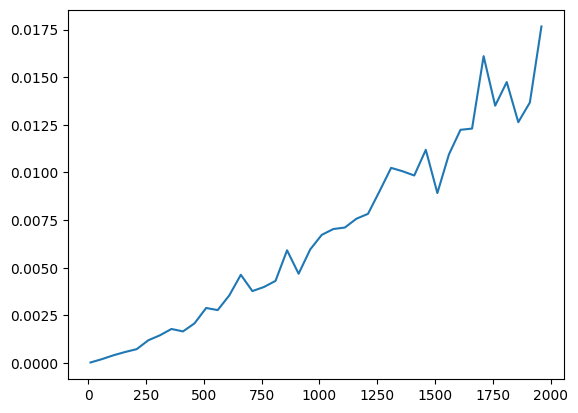

In [9]:
plot_time(lambda i:random_binary_tree_GW_approx(i-i/10,i+i/10), 10, 2000, 50)

In [10]:
print(random_binary_tree_GW_approx(900,1_100))

(350, 17522, ['z', ['z', [], ['z', [], ['z', [], ['z', [], ['z', ['z', [], []], ['z', [], ['z', ['z', ['z', ['z', ['z', [], []], ['z', ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', ['z', [], []], ['z', ['z', [], ['z', [], []]], []]]], ['z', [], []]], []], ['z', ['z', [], []], []]], []], ['z', [], ['z', ['z', [], ['z', ['z', [], ['z', ['z', [], ['z', ['z', [], ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', [], []], []], []], ['z', ['z', [], []], []]]], []], ['z', [], ['z', [], []]]]], ['z', ['z', [], []], []]]], []]], []]], ['z', [], ['z', ['z', ['z', [], []], ['z', ['z', [], []], ['z', ['z', [], []], []]]], []]]]]], ['z', [], []]]], []], []], ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', [], ['z', ['z', ['z', [], []], []], []]]], ['z', ['z', ['z', ['z', ['z', [], []], []], []], []], ['z', ['z', ['z', [], []], []], ['z', ['z', ['z', ['z', ['z', [], []], []], []], ['z', ['z', [], []], ['z', ['z', ['z', [], []], ['z', ['z', ['z', ['z', ['z', [], []], []], ['z', [], ['z', ['z', ['z', ['z', 

In [11]:
print(random_binary_tree_GW_approx(9_000,11_000))

(1830, 193199, ['z', [], ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', ['z', ['z', [], []], ['z', ['z', ['z', [], []], []], []]], []]], ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', [], []], ['z', [], []]], []], []], []], ['z', [], []]]], ['z', [], ['z', [], ['z', ['z', ['z', [], ['z', [], []]], ['z', [], ['z', [], []]]], ['z', ['z', [], ['z', ['z', [], []], ['z', ['z', [], []], []]]], ['z', [], ['z', ['z', [], ['z', [], ['z', [], []]]], ['z', ['z', ['z', ['z', ['z', ['z', ['z', [], []], []], ['z', ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', [], []], ['z', ['z', [], ['z', ['z', [], []], ['z', ['z', ['z', [], ['z', [], ['z', ['z', ['z', ['z', [], []], []], []], []]]], ['z', [], ['z', ['z', ['z', ['z', [], ['z', ['z', ['z', [], ['z', [], ['z', [], ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', [], []]], []], ['z', [], ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', [], ['z', ['z', [], ['z', ['z',

In [12]:
t = time()
print(random_binary_tree_GW_approx(90_000,110_000))
print(time() - t)

(6334, 2080886, ['z', [], ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', [], []]], ['z', ['z', [], []], ['z', [], ['z', ['z', ['z', ['z', ['z', [], []], ['z', [], ['z', [], ['z', [], []]]]], ['z', ['z', ['z', ['z', [], ['z', ['z', ['z', [], []], []], ['z', [], ['z', [], []]]]], ['z', ['z', [], []], []]], []], ['z', ['z', [], ['z', ['z', [], ['z', [], []]], []]], []]]], ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', [], []], []], ['z', [], []]], ['z', [], ['z', ['z', [], []], ['z', ['z', [], []], ['z', ['z', [], []], ['z', ['z', [], []], []]]]]]], []]], ['z', [], ['z', ['z', [], ['z', [], []]], ['z', ['z', ['z', ['z', [], ['z', [], ['z', ['z', ['z', [], ['z', ['z', ['z', [], ['z', [], ['z', ['z', [], ['z', [], []]], ['z', [], ['z', [], ['z', ['z', ['z', ['z', [], []], []], []], []]]]]]], []], ['z', ['z', ['z', [], ['z', ['z', [], []], []]], []], ['z', [], []]]]], []], []]]], ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', [], ['z', [], []]], ['z', ['z', ['z', ['z', ['z', [],

In [13]:
t = time()
print(random_binary_tree_GW_approx(900_000,1_100_000)[3])
print(time() - t)

946440
31.537046909332275


In [14]:
t = time()
print(random_binary_tree_GW_approx(1000000,2000000)[3])
print(time() - t)

1126381
34.44107127189636


In [15]:
def counts_max_and_average(gen,nb):
    counts = []
    discard = 0
    for i in range(nb):
        size = gen()
        if size > 0:
            counts.append(size)
        else:
            discard +=1
    return discard, counts, max(counts), sum(counts)/nb

In [16]:
n = 100_000
d, l, m, a = counts_max_and_average(lambda : random_binary_tree_GW_free(1000)[1], n)
print(d,m,a)

3639 1000 33.17336


In [17]:
plt.rcParams['figure.figsize'] = [10, 4]

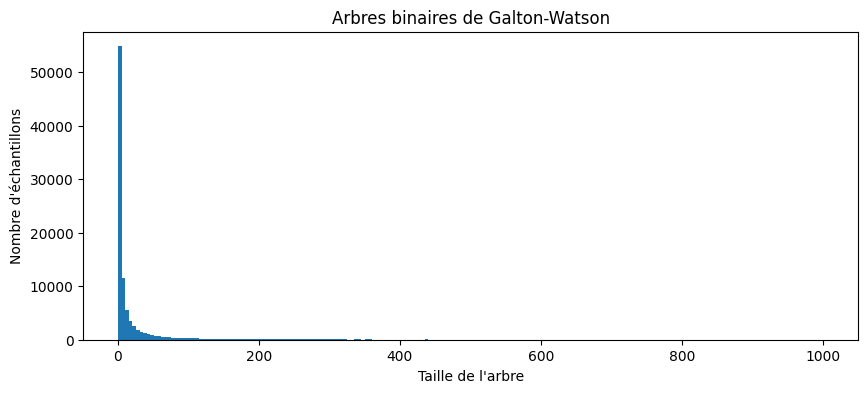

<Figure size 2000x400 with 0 Axes>

In [18]:
plt.hist(l,bins=200)
plt.title("Arbres binaires de Galton-Watson")
plt.xlabel("Taille de l'arbre")
plt.ylabel("Nombre d'échantillons")
f = plt.figure()
f.set_figwidth(20)
plt.show()

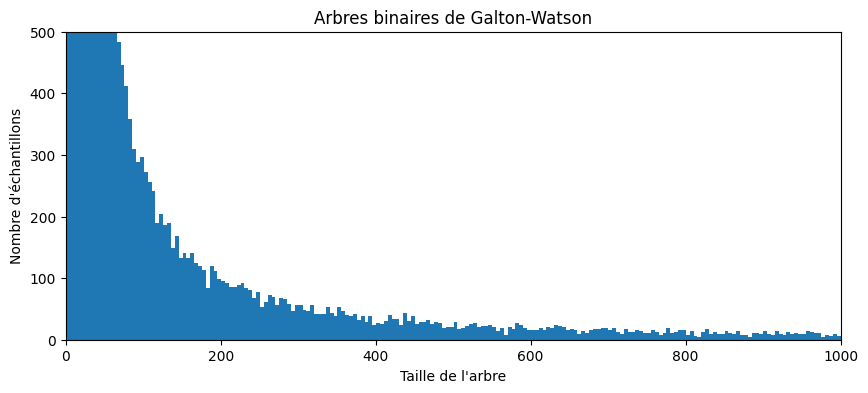

In [19]:
plt.hist(l,bins=200)
plt.title("Arbres binaires de Galton-Watson")
plt.xlabel("Taille de l'arbre")
plt.ylabel("Nombre d'échantillons")
plt.axis([0, 1000, 0, 500])
plt.show()